In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('us-election-2012-results-by-county.csv')

In [3]:
df

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,23594,CO,Summit,6059,8117,20,20,15038,16,SEP,Jerry,White,1
23234,23595,CO,Teller,6060,8119,13,13,12144,16,SEP,Jerry,White,1
23235,23596,CO,Washington,6061,8121,6,6,2567,16,SEP,Jerry,White,1
23236,23597,CO,Weld,6062,8123,109,109,112695,16,SEP,Jerry,White,5


In [4]:
# shape of the dataset i.e number fo rows and columns
df.shape

(23238, 13)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23238 entries, 0 to 23237
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   County2012Id       23238 non-null  int64 
 1   StateCode          23238 non-null  object
 2   CountyName         23238 non-null  object
 3   CountyNumber       23238 non-null  int64 
 4   FipsCode           23238 non-null  int64 
 5   PrecintsReporting  23238 non-null  int64 
 6   TotalPrecincts     23238 non-null  int64 
 7   CountyTotalVotes   23238 non-null  int64 
 8   SourceOrder        23238 non-null  int64 
 9   Party              23238 non-null  object
 10  FirstName          23221 non-null  object
 11  LastName           23238 non-null  object
 12  Votes              23238 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.3+ MB


In [6]:
# statistical Analysis
df.describe()

,County2012Id,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Votes
count,23238.000000,23238.000000,23238.000000,23238.000000,23238.000000,2.323800e+04,23238.000000,2.323800e+04
mean,11798.502281,26355.031629,29393.794905,44.478354,44.678845,3.189770e+04,3.558051,5.300142e+03
std,6818.875460,13792.055582,14602.212720,152.736880,153.454698,9.414363e+04,2.507528,2.919487e+04
min,2.000000,1001.000000,1001.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00
25%,5881.250000,16091.000000,19181.000000,4.000000,4.000000,2.543000e+03,2.000000,1.600000e+01
50%,11831.500000,24011.000000,27021.000000,14.000000,14.000000,7.684000e+03,3.000000,1.060000e+02
75%,17700.750000,39048.750000,42096.500000,32.000000,32.000000,1.972600e+04,4.000000,1.854000e+03
max,23598.000000,51408.000000,56045.000000,4993.000000,4993.000000,2.427869e+06,16.000000,1.672164e+06


In [7]:
# checking for null values in the dataset
df.isnull().sum()

,0
County2012Id,0
StateCode,0
CountyName,0
CountyNumber,0
FipsCode,0
PrecintsReporting,0
TotalPrecincts,0
CountyTotalVotes,0
SourceOrder,0
Party,0


**Categorical Graphs**

In [8]:
# Bar chart of Votes by State

def plot_votes_by_state(df):
    votes_by_state = df.groupby('StateCode')['Votes'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    votes_by_state.plot(kind='bar', color='skyblue')
    plt.title('Total Votes by State')
    plt.xlabel('State Code')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90)
    plt.show()

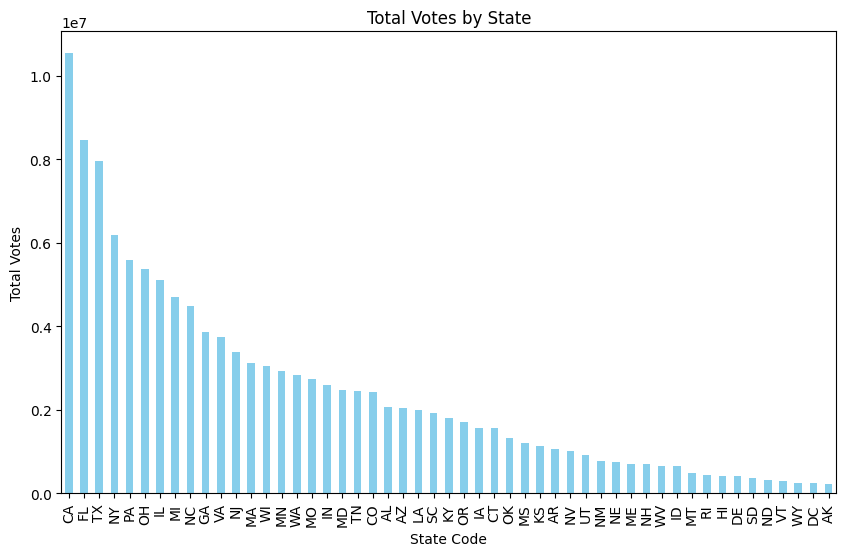

In [9]:
plot_votes_by_state(df)

In [10]:
# Pie chart of Votes for Democratic Candidate by State

def plot_dem_votes_pie(df):
    dem_votes_by_state = df[df['Party'] == 'Dem'].groupby('StateCode')['Votes'].sum()

    plt.figure(figsize=(9, 9))
    dem_votes_by_state.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Pastel1')
    plt.title('Proportion of Votes for Democratic Candidate by State')
    plt.ylabel('')  # Hide y-label for cleaner presentation
    plt.show()

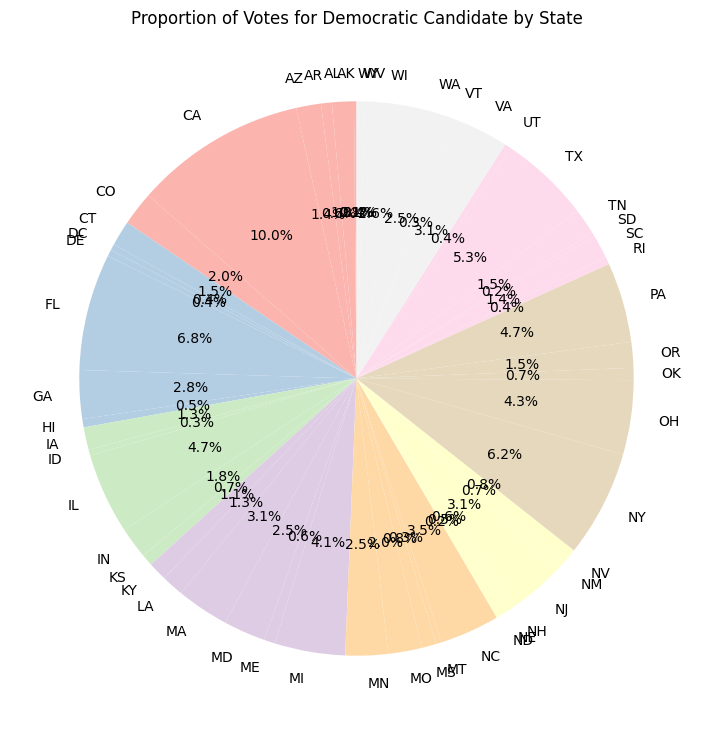

In [11]:
plot_dem_votes_pie(df)

**Relational Graph**

In [26]:
# Scatterplot of Votes vs. Total Precincts

def plot_votes_vs_precincts(df):
    plt.figure(figsize=(10, 6))  # Increase figure size for better spacing
    sns.scatterplot(data=df, x='TotalPrecincts', y='Votes', hue='StateCode', palette='coolwarm')

    # Title and axis labels
    plt.title('Votes vs. Total Precincts by County')
    plt.xlabel('Total Precincts')
    plt.ylabel('Votes')

    # Adjust the legend to be outside the plot
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout using subplots_adjust instead of tight_layout
    plt.subplots_adjust(right=0.8)  # Reserve space on the right for the legend

    # Display the plot
    plt.show()

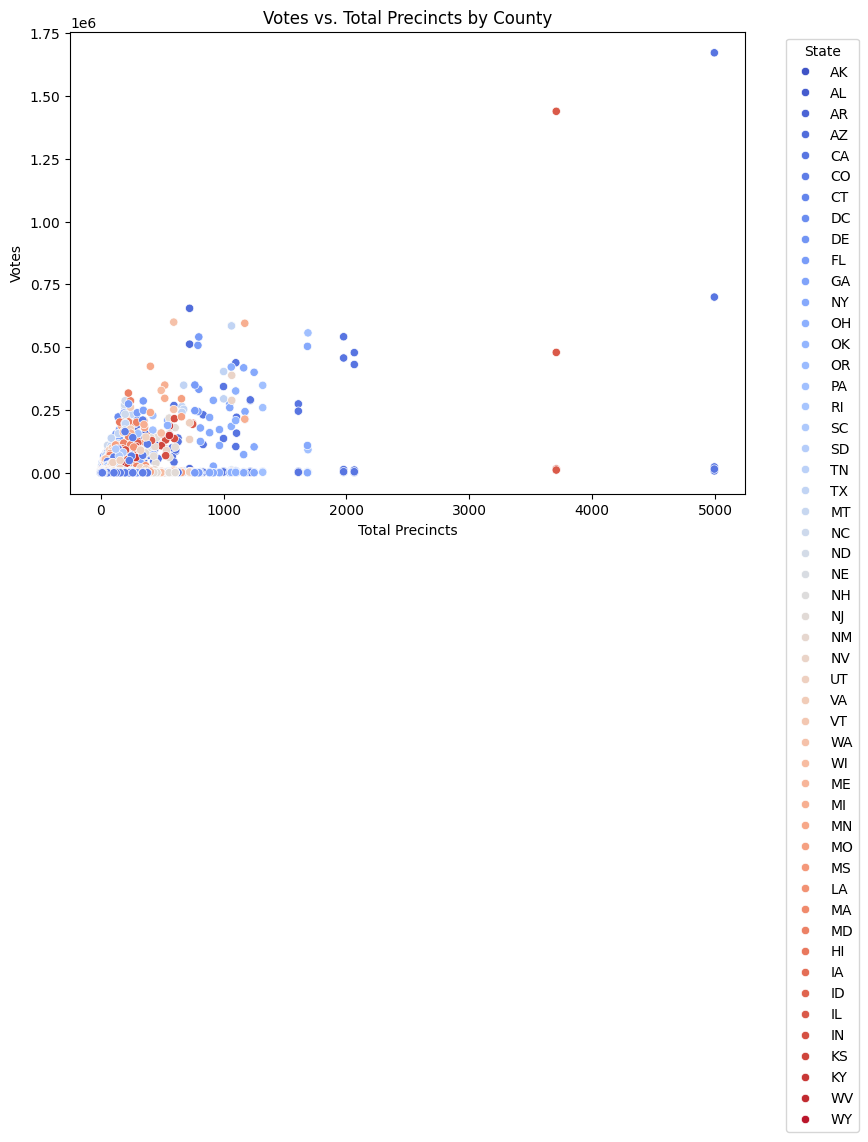

In [27]:
plot_votes_vs_precincts(df)

In [ ]:
# Line Plot of Obama Bote Percentage By Country

def plot_obama_vote_percent(df):
    df['ObamaVotePercent'] = (df[df['LastName'] == 'Obama']['Votes'] / df['CountyTotalVotes']) * 100

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='CountyName', y='ObamaVotePercent', hue='StateCode', marker='o')
    plt.title('Percentage of Votes for Obama Over Total County Votes')
    plt.xlabel('County Name')
    plt.ylabel('Obama Vote Percentage (%)')
    plt.xticks(rotation=90)
    plt.show()

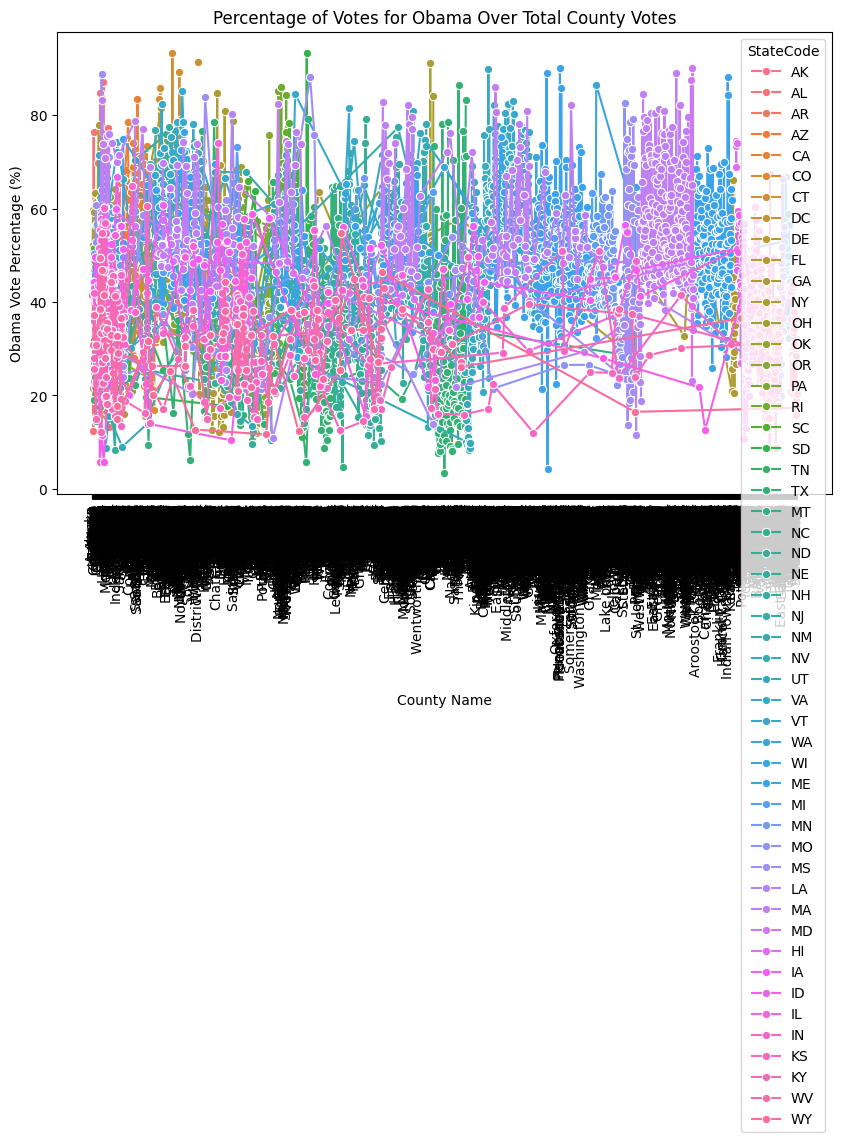

In [ ]:
plot_obama_vote_percent(df)

In [ ]:
def plot_precincts_reporting_vs_total(df):
    df['PrecinctsReportedPercent'] = (df['PrecintsReporting'] / df['TotalPrecincts']) * 100

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='CountyName', y='PrecinctsReportedPercent', hue='StateCode', marker='o')
    plt.title('Percentage of Precincts Reporting Over Total Precincts by County')
    plt.xlabel('County Name')
    plt.ylabel('Precincts Reporting (%)')
    plt.xticks(rotation=90)
    plt.show()


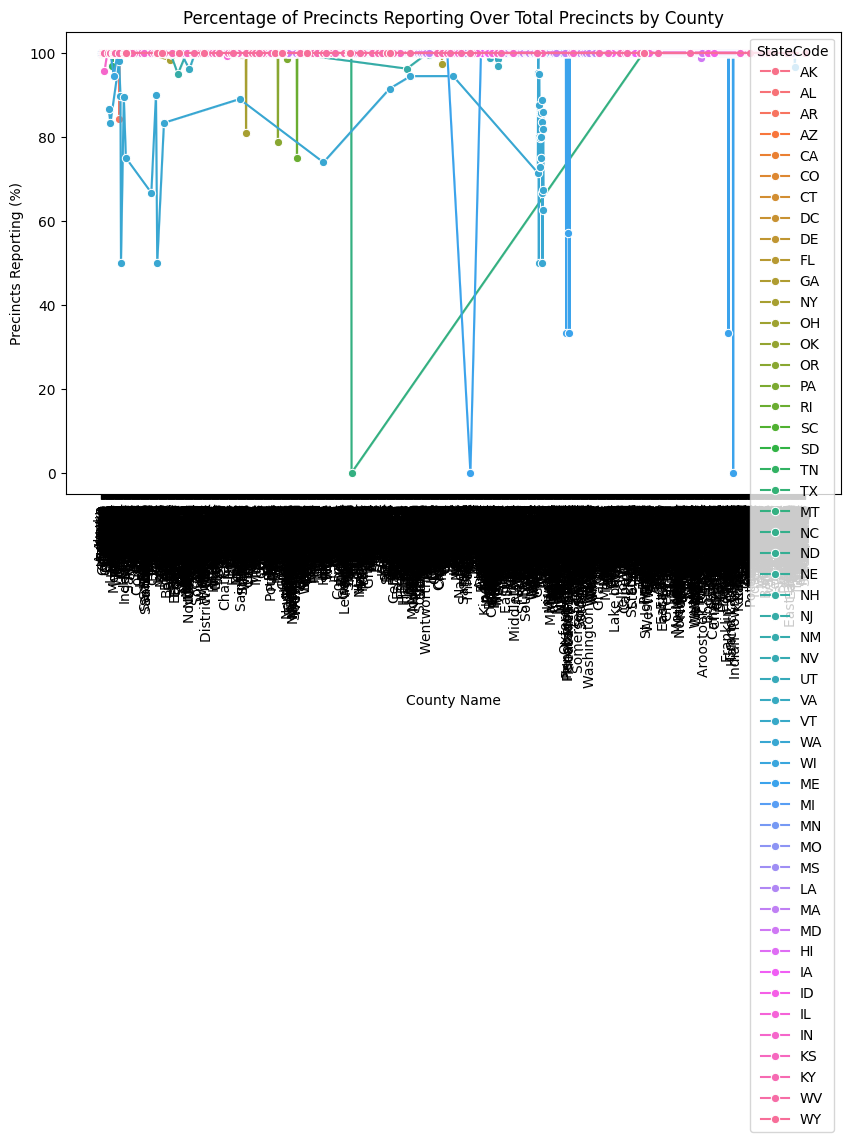

In [ ]:
plot_precincts_reporting_vs_total(df)

**Statistical Graphs**

In [ ]:
# Heatmap of Correlation Between Numeric Features

def plot_correlation_heatmap(df):
    correlation = df[['PrecintsReporting', 'TotalPrecincts', 'CountyTotalVotes', 'Votes']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='Blues', linewidths=0.5)
    plt.title('Correlation Heatmap of Election Dataset')
    plt.show()

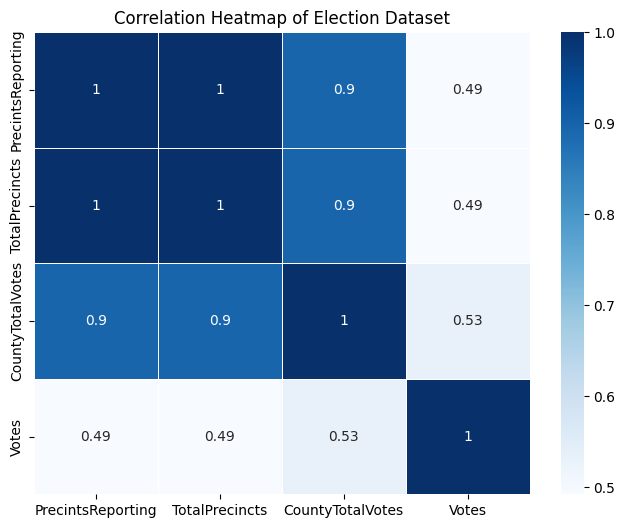

In [ ]:
plot_correlation_heatmap(df)

In [ ]:
# Confusion Matrix for Party Classification

def plot_confusion_matrix(df):
    df['PartyLabel'] = df['Party'].apply(lambda x: 1 if x == 'Dem' else 0)
    df['PredictedParty'] = df['Votes'].apply(lambda x: 1 if x > df['Votes'].mean() else 0)

    conf_matrix = confusion_matrix(df['PartyLabel'], df['PredictedParty'])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Other', 'Dem'], yticklabels=['Other', 'Dem'])
    plt.title('Confusion Matrix of Party Classification')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

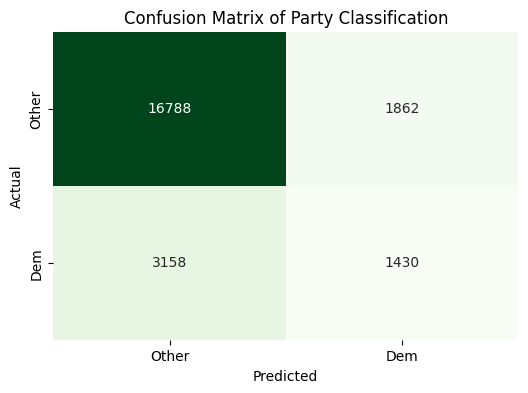

In [ ]:
plot_confusion_matrix(df)